## Senanur Ağaç - 200102002043

### LAB03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fft
from scipy.fft import fftshift
from scipy.fft import ifft2

In [2]:
def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval


### Fig0424(a)(rectangle)

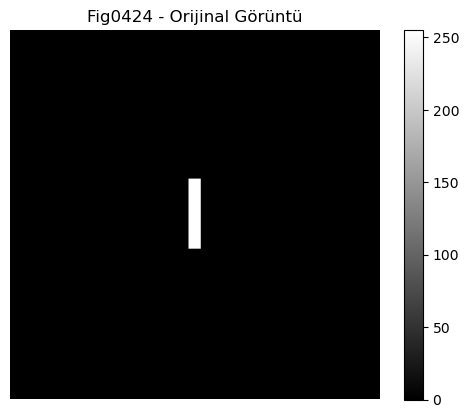

In [3]:
Fig0424, width, height, maxval = mypgmread('Fig0424(a)(rectangle).pgm')
plt.imshow(Fig0424, cmap='gray')
plt.colorbar()
plt.title('Fig0424 - Orijinal Görüntü')
plt.axis('off')
plt.show()

### Orjinal görüntüdür.

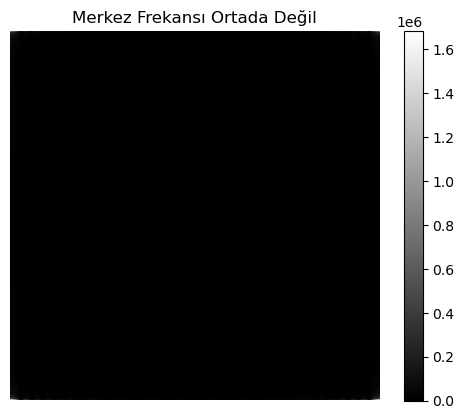

In [4]:
def my_2d_fft(input_array):
    # Her satır için 1D FFT 
    fft_result = np.array([fft(row) for row in input_array])

    # Her sütun için 1D FFT 
    fft_result = np.array([fft(fft_result[:, i]) for i in range(fft_result.shape[1])]).T

    return fft_result

Fig0424bspect = my_2d_fft(Fig0424)
plt.imshow(np.abs(Fig0424bspect), cmap='gray')
plt.colorbar()
plt.title('Merkez Frekansı Ortada Değil')
plt.axis('off')

plt.show()

### Orjinal görüntüye 2 boyutta(önce satırları daha sonra sutunları) fourier dönüşümü uygulanmıştır. Bu şekilde DC Noktası (0,0) başta olak üzere köşe değerleridir. Şekilde de köşe değerlerinde beyazlık gözlenmiştir.

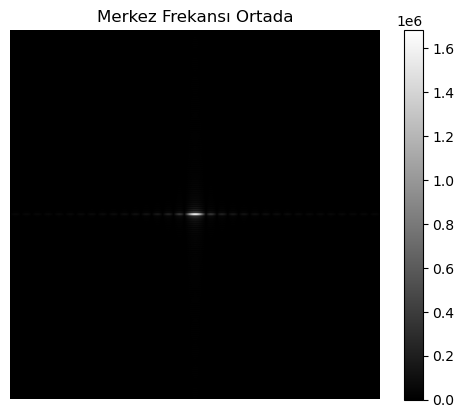

In [5]:
Fig0424shift = my_2d_fft(Fig0424)
centered_spectrum = fftshift(Fig0424bspect)
plt.imshow(np.abs(centered_spectrum), cmap='gray')
plt.colorbar()
plt.title('Merkez Frekansı Ortada')
plt.axis('off')

plt.show()


### fftshift ile dc noktası köşe değerlerden merkeze taşınmıştır. Artık beyaz kısım merkezde görülmektedir.

(-0.5, 1023.5, 1023.5, -0.5)

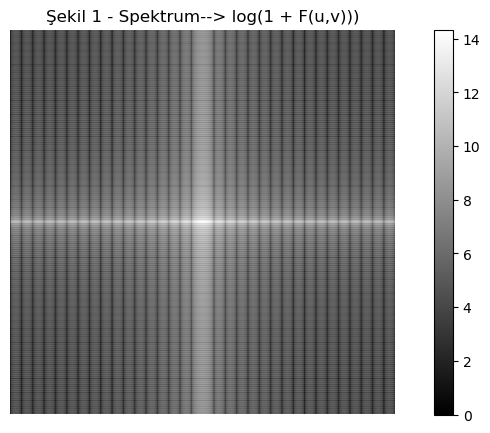

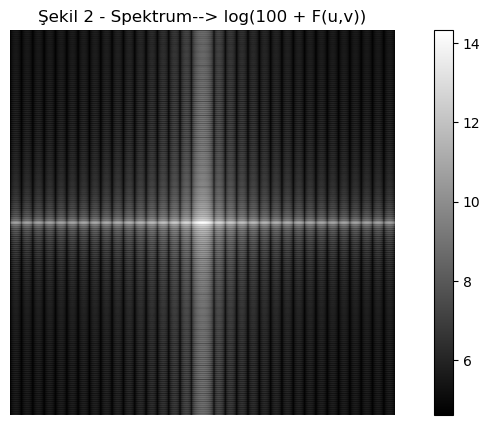

In [6]:
magnitude_spectrum = np.abs(fftshift(Fig0424bspect))
magnitude_spectrum = np.log(1 + magnitude_spectrum)  # Logaritmik ölçek
plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.colorbar()
plt.title('Şekil 1 - Spektrum--> log(1 + F(u,v)))')
plt.axis('off')

magnitude_spectrum2 = np.abs(fftshift(Fig0424bspect))
magnitude_spectrum2 = np.log(100 + magnitude_spectrum2)  # Logaritmik ölçek
plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.colorbar()
plt.title('Şekil 2 - Spektrum--> log(100 + F(u,v))')
plt.axis('off')


### Logaritma transformu alındığında şekildeki gibi gözükmektedir. Logaritmik tranformun katsayısı 1 değil de daha yüksek bir rakam alındığında daha siyah olduğu şekil 2'de gözlenmiştir. 

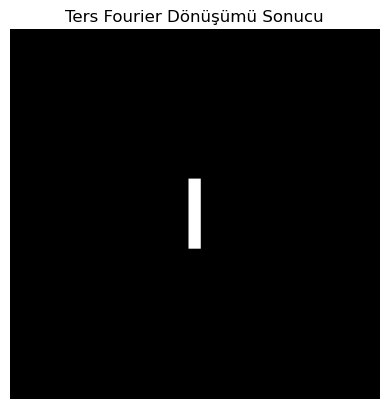

In [7]:
Fig0424bspect = my_2d_fft(Fig0424)

reconstructed_image = ifft2(Fig0424bspect)

reconstructed_image = np.real(reconstructed_image)


plt.imshow(reconstructed_image, cmap='gray')
plt.title('Ters Fourier Dönüşümü Sonucu')
plt.axis('off')
plt.show()

### Son olarak ters fourier dönüşümü alınarak ilk görüntü tekrardan elde edilmiştir 